# WeRateDogs

In [116]:
import pandas as pd
import requests
import json as js
import numpy as np
import matplotlib.pyplot as plt
import tweepy as tw
import os
import seaborn as sns


# Gathering data

### Enhanced Twitter Archive

In [43]:
#load twitter archive file into pandas df.
df_arch = pd.read_csv('twitter-archive-enhanced.csv')

### Image Predictions File

In [44]:
#download image predictions file.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# GET the file name programmatically
file_name = url.split('/')[-1]

# Write the file with the context manager with:
with open(file_name, 'wb') as file:
     file.write(response.content)

In [45]:
# load image predictions file into pandas df.
df_pred = pd.read_csv('image-predictions.tsv', sep='\t')

### Download Tweet JSON Data

##### unfortunatly my twitter developer account isnt verified yet so rather I am typing the code but I am using the file downladed from calssroom

In [13]:
#consumer_key= '!!!!!!!!!'
#consumer_secret= '!!!!!!!!!'
#access_token= '!!!!!-!!!!!!!'
#access_token_secret= '!!!!!!!!!'

#auth = tw.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)
#api = tw.API(auth, wait_on_rate_limit=True)

In [46]:
#loading tweets json into list and get only tweet id, retweet count, favorite count 

tweet_json = []
with open('tweet-json.txt') as file:
    for line in file:
        lin = js.loads(line)
        tweet_json.append({'tweet_id':lin['id'],
                           'retweet_count':lin['retweet_count'],
                           'favorite_count':lin['favorite_count']})

In [47]:
#convert tweet_json list to dataframe
df_j = pd.DataFrame(tweet_json, columns = ['tweet_id', 'retweet_count', 'favorite_count'])


# Assess Data

#### After assessing data visually through text editor, we will assess data through some pandas functions


In [48]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [49]:
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [50]:
df_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [51]:
df_arch.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [52]:
df_arch[df_arch.rating_numerator<(10)].count()[0]

440

In [53]:
df_arch[df_arch.rating_numerator<(10)].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [54]:
df_arch.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [55]:
df_arch[df_arch.rating_denominator!=10].count()[0]

23

In [56]:
df_arch[df_arch.rating_denominator==0].count()[0]

1

In [57]:
df_arch.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
            ... 
Napolean       1
Rumble         1
Hubertson      1
Livvie         1
Robin          1
Name: name, Length: 957, dtype: int64

In [58]:
df_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [59]:
df_arch.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
            ... 
Napolean       1
Rumble         1
Hubertson      1
Livvie         1
Robin          1
Name: name, Length: 957, dtype: int64

In [60]:
df_pred.head(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False
97,667728196545200128,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,1,kuvasz,0.360159,True,golden_retriever,0.293744,True,Labrador_retriever,0.270673,True
98,667766675769573376,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,fire_engine,0.883493,False,tow_truck,0.074734,False,jeep,0.012773,False


In [63]:
df_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
901,700002074055016451,https://pbs.twimg.com/media/CbboKP4WIAAw8xq.jpg,1,Chihuahua,0.369488,True,schipperke,0.243367,True,pug,0.161614,True
531,676821958043033607,https://pbs.twimg.com/media/CWSN-vaXAAA8Ehr.jpg,2,Great_Pyrenees,0.869804,True,kuvasz,0.079814,True,standard_poodle,0.013263,True
1893,849412302885593088,https://pbs.twimg.com/media/C8m3-iQVoAAETnF.jpg,4,schipperke,0.907559,True,crossword_puzzle,0.017934,False,Chihuahua,0.016191,True
590,679148763231985668,https://pbs.twimg.com/media/CWzSMmAWsAAyB1u.jpg,1,Italian_greyhound,0.302685,True,hair_slide,0.124281,False,Afghan_hound,0.059846,True
1183,738537504001953792,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1,chow,0.808737,True,gibbon,0.028942,False,Pembroke,0.026498,True
396,673656262056419329,https://pbs.twimg.com/media/CVlOy3pW4AQ9H1K.jpg,1,bull_mastiff,0.700625,True,Rhodesian_ridgeback,0.094698,True,Brabancon_griffon,0.057559,True
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True
1726,820314633777061888,https://pbs.twimg.com/media/C2JXyARUAAE4gbL.jpg,2,Gordon_setter,0.940724,True,black-and-tan_coonhound,0.042041,True,Rottweiler,0.009417,True
602,679828447187857408,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,Chihuahua,0.346545,True,dalmatian,0.166246,True,toy_terrier,0.117502,True
1562,793500921481273345,https://pbs.twimg.com/media/CwMU34YWIAAz1nU.jpg,2,golden_retriever,0.326122,True,Labrador_retriever,0.219904,True,Chesapeake_Bay_retriever,0.163366,True


In [64]:
df_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [65]:
df_pred.loc[597,'jpg_url']

'https://pbs.twimg.com/media/CW4tL1vWcAIw1dw.jpg'

In [66]:
from IPython.display import Image
Image(url='https://pbs.twimg.com/media/CW4tL1vWcAIw1dw.jpg')

In [67]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [68]:
df_j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


# Cleaning


### Make a copy for for being in the safe side

In [71]:
df_arch_c = df_arch.copy()
df_pred_c = df_pred.copy()
df_j_c = df_j.copy()

In [72]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Define

#### meging the 3 sources of data in one data frame, we will make thin on 2 stages

## Code

In [73]:
tweets = df_arch_c.merge(df_pred_c, how = 'left', on = 'tweet_id')


In [74]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [75]:
tweets = tweets.merge(df_j_c, how = 'left', on = 'tweet_id')


In [76]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [77]:
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


## Define

#### Iterate through each row and extract the source's text with beautiful soup

## Code

In [78]:
from bs4 import BeautifulSoup as bs

new_source = []
for line, row in tweets.iterrows():
    soup = bs(row.source)
    x = soup.find('a').contents[0]
    new_source.append(x)
    
tweets['source'] = new_source

In [79]:
pd.Series(new_source).value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
dtype: int64

In [80]:
pd.pivot_table(tweets, index=['doggo', 'floofer', 'pupper', 'puppo'],values = 'tweet_id', aggfunc='count')

tweet_id
doggo floofer pupper puppo          
None  None    None   None       1976
                     puppo        29
              pupper None        245
      floofer None   None          9
doggo None    None   None         83
                     puppo         1
              pupper None         12
      floofer None   None          1

## Define

#### 4 different columns (doggo, floofer, pupper, and puppo) can be concatenated in just a column.

## Code

In [81]:
# Extract doggo, floofer, pupper and puppo columns into new 'dog_stage' column 
tweets['doggy_meter'] = tweets['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [82]:
# Drop doggo, floofer, pupper, and puppo columns
tweets= tweets.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [83]:
tweets.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,doggy_meter
646,793150605191548928,NaN,NaN,2016-10-31 18:00:14 +0000,Twitter for iPhone,This is Nida. She's a free elf. Waited so long...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793150605...,...,True,bluetick,0.160380,True,standard_poodle,0.125982,True,1984.0,6909.0,NaN
1278,708853462201716736,NaN,NaN,2016-03-13 03:13:29 +0000,Vine - Make a Scene,This is Lucy. She doesn't understand fetch. 8/...,NaN,NaN,NaN,https://vine.co/v/iHl2UDEBZ95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,745.0,1941.0,NaN
696,786664955043049472,NaN,NaN,2016-10-13 20:28:35 +0000,Twitter for iPhone,"""Honestly Kathleen I just want more Ken Bone"" ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786664955...,...,True,keeshond,0.464816,True,Pomeranian,0.007812,True,2996.0,11957.0,NaN
2102,670679630144274432,NaN,NaN,2015-11-28 19:04:19 +0000,Twitter for iPhone,This is Pluto. He's holding little waddling do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670679630...,...,True,Brittany_spaniel,0.229065,True,Chihuahua,0.104029,True,315.0,799.0,NaN
1687,681579835668455424,NaN,NaN,2015-12-28 20:57:50 +0000,Twitter for iPhone,This is Apollo. He thought you weren't coming ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681579835...,...,True,Labrador_retriever,0.096585,True,Staffordshire_bullterrier,0.040333,True,1489.0,3893.0,NaN
1701,680940246314430465,NaN,NaN,2015-12-27 02:36:20 +0000,Twitter for iPhone,This is Alice. She's an idiot. 4/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680940246...,...,True,West_Highland_white_terrier,0.157195,True,toy_poodle,0.074435,True,1225.0,3544.0,NaN
1532,690005060500217858,NaN,NaN,2016-01-21 02:56:40 +0000,Twitter for iPhone,"""I'm the only one that ever does anything in t...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/690005060...,...,True,Great_Pyrenees,0.114027,True,teddy,0.072475,False,1907.0,4004.0,NaN
1131,728986383096946689,NaN,NaN,2016-05-07 16:34:32 +0000,Twitter for iPhone,This is Puff. He started out on the streets (f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728986383...,...,True,toy_poodle,0.027271,True,miniature_poodle,0.004874,True,917.0,3460.0,NaN
1166,722613351520608256,NaN,NaN,2016-04-20 02:30:23 +0000,Twitter for iPhone,Meet Schnitzel. He's a Tropicana Floofboop. Ge...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722613351...,...,True,golden_retriever,0.288230,True,chow,0.044854,True,1831.0,5393.0,NaN
562,802600418706604034,NaN,NaN,2016-11-26 19:50:26 +0000,Vine - Make a Scene,This is Bailey. She has mastered the head tilt...,NaN,NaN,NaN,https://vine.co/v/5FwUWjYaW0Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1714.0,7938.0,NaN


In [84]:
some unusefull columns needed to be droped

SyntaxError: invalid syntax (<ipython-input-84-e95bbdaa47c1>, line 1)

In [85]:
tweets = tweets.drop(['retweeted_status_user_id', 
                        'retweeted_status_timestamp',
                          'in_reply_to_status_id',
                          'in_reply_to_user_id',
                        'retweeted_status_id' ], axis=1)

##### timestamp is object, not a datatime and needed to be converted

In [86]:
tweets['timestamp'] = pd.to_datetime(tweets['timestamp'])

In [87]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   jpg_url             2075 non-null   object             
 9   img_num             2075 non-null   float64            
 10  p1                  2075 non-null   object             
 11  p1_conf             2075 non-null   float64            
 12  p1_dog              2075 non-null 

##### we only need original tweets with images, witch make we drop tweets without images('expanded_urls' is NaN)

In [88]:
tweets= tweets.dropna(subset = ['expanded_urls'])

In [89]:
tweets.expanded_urls.isnull().sum()

0

#### Some string in p1, p2 and p3 are captalizaed, and some are not.

In [91]:
tweets['p1'] = tweets['p1'].str.lower()
tweets['p2'] = tweets['p2'].str.lower()
tweets['p3'] = tweets['p3'].str.lower()

In [118]:
tweets.to_csv('tweets.csv', index=False)

In [93]:
tweets.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,doggy_meter
147,863432100342583297,2017-05-13 16:33:49+00:00,Twitter for iPhone,This is Belle. She's never been more pupset. E...,https://twitter.com/dog_rates/status/863432100...,12,10,Belle,https://pbs.twimg.com/media/C_uG6eAUAAAvMvR.jpg,1.0,...,True,french_bulldog,0.10336,True,beagle,0.079489,True,5664.0,24829.0,NaN


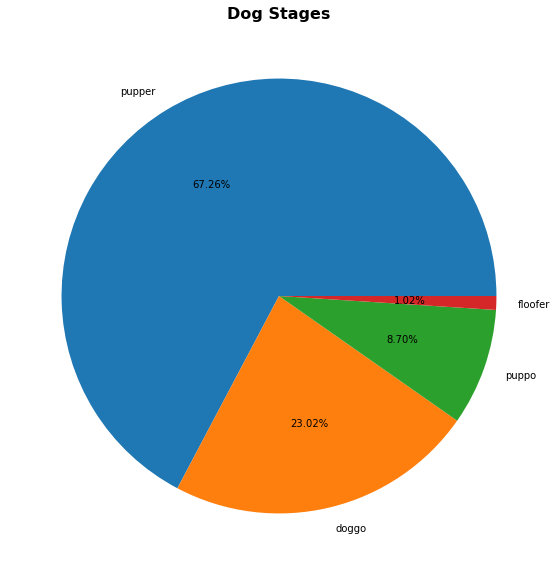

In [101]:
#showing a Pie chart for the doggy meter
tweets['doggy_meter'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(10,10))

plt.ylabel('')
plt.title('Dog Stages', weight='bold', fontsize=16);

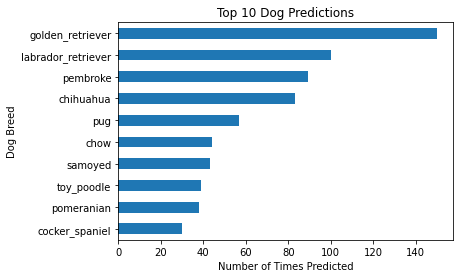

In [103]:
#Make a bar plot for top 10 dog breeds
tweets['p1'].value_counts()[9::-1].plot(kind='barh')
plt.title('Top 10 Dog Predictions')
plt.xlabel('Number of Times Predicted')
plt.ylabel('Dog Breed')
plt.fontsize = 12

Twitter for iPhone     2163
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64


Text(0.5, 1.0, 'The Distribution of Source')

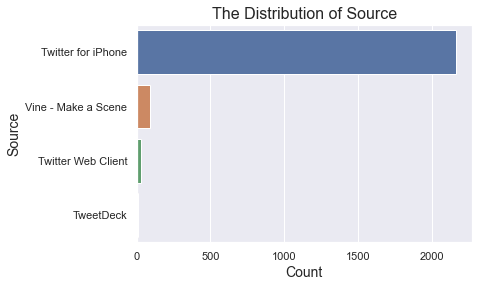

In [109]:
sorted_source = tweets['source'].value_counts().index
print(tweets['source'].value_counts())
sns.set(style="darkgrid")
sns.countplot(data = tweets, y = 'source', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16)

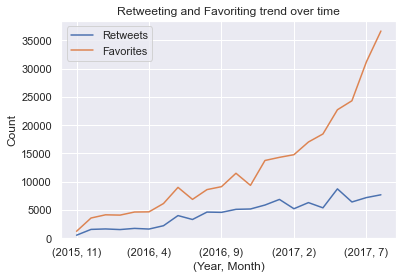

In [140]:
plt.subplots(1, sharex=True)
tweets.retweet_count.groupby([tweets["timestamp"].dt.year, tweets["timestamp"].dt.month]).mean().plot(kind='line')
tweets.favorite_count.groupby([tweets["timestamp"].dt.year, tweets["timestamp"].dt.month]).mean().plot(kind='line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')

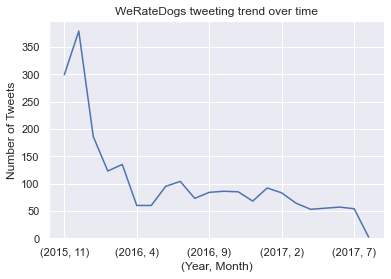

In [143]:
data = tweets.tweet_id.groupby([tweets["timestamp"].dt.year, tweets["timestamp"].dt.month]).count()
ax = data.plot(kind='line', title='WeRateDogs tweeting trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend')